# Assignment 4: Reinforcement Learning and Deep Learning
## Part 1: Q-Learning
### Part 1.1: Single-Player Pong

In [1]:
%load_ext autoreload

In [33]:
%autoreload 2
from Pong import *
from Automation import *
from matplotlib import pyplot as plt

def get_shit_done(c, gamma, ne, is_train):
    name = '_'.join(['c'+str(c), 'gamma'+str(gamma), 'ne'+str(ne)])

    #        def __init__(self, boardSize, alpha, gamma, ne):
    myagent = Pong.Agent((12, 12), lambda x: c / (c + x), gamma, ne)
    pong = Pong(0.5, 0.5, 0.03, 0.01, 0.5 - Pong.PADDLE_HEIGHT / 2, (12, 12))

    directory = './training_result/'
    training_count_file = 'training_' + name + '_count.txt'
    training_file = 'training_' + name + '_file.txt'

    training_count = 0

    if find(directory, training_file):
        with open(directory + training_file, 'r') as f:
            training = f.read()
            myagent.action_utility = parse_utility(decode(training))
        if find(directory, training_count_file):
            with open(directory + training_count_file, 'r') as f:
                training_count = int(f.read())
    else:
        if is_train == 0:
            print("not input file:", directory + training_file)

    # benchmark
    now = datetime.now()

    # testing trained result
    
#     for i in range(50000):
# #         if i % 1000 == 0:
# #             print(i, 'times ', (datetime.now() - now).seconds, 'seconds')
#         pong.restart(0.5, 0.5, 0.03, 0.01, 0.5 - Pong.PADDLE_HEIGHT / 2)
#         pong.game(myagent)
#         training_count += 1
        
    if is_train == 0:
        myagent.set_explore(False)
        total = 0
        for i in range(1000):
            pong.restart(0.5, 0.5, 0.03, 0.01, 0.5 - Pong.PADDLE_HEIGHT / 2)
            pong.game(myagent)
            total += pong.state.bounce_count
        print('average bounces per round', total/1000)
        store_training_result('./training_result/', 'training_objects.json', c, gamma, ne, total/1000)

    mean_episode_rewards = []
    episodes = []
    for k in range(5, 150, 10):
        new_agent = Pong.Agent((12, 12), lambda x: c / (c + x), gamma, ne)
        total = 0
        for i in range(k*1000):
    #         if i % 1000 == 0:
    #             print(i, 'times ', (datetime.now() - now).seconds, 'seconds')
            pong.restart(0.5, 0.5, 0.03, 0.01, 0.5 - Pong.PADDLE_HEIGHT / 2)
            pong.game(new_agent)
            total += pong.state.bounce_count
        print(k, total/k/1000)
        mean_episode_rewards.append(total/k/1000)
        episodes.append(k)

    plt.figure()
    plt.plot(episodes, mean_episode_rewards)
    plt.title('Mean Episode Rewards')
    plt.xlabel('Number Episodes')
    plt.ylabel('Rewards')
    plt.show()

    time_spent = (datetime.now() - now).seconds
    # print(myagent.action_utility)


    # store training results
    training_result = encode(myagent.action_utility)
    with open(directory + training_file, 'w') as f:
        f.write(training_result)

    with open(directory + training_count_file, 'w') as f:
        f.write(str(training_count))
    print("stop training")
    print('time spent: ', time_spent)

not input file: ./training_result/training_c10_gamma0.75_ne75_file.txt
average bounces per round 1.585
5 1.123
15 1.4859333333333333
25 1.93376
35 3.5391142857142857
45 5.011022222222222
55 6.418218181818181
65 8.022107692307692
75 8.346
85 9.007694117647059
95 9.237936842105261
105 9.642561904761903
115 9.914860869565217
125 10.289944
135 10.972266666666666
145 10.226579310344826


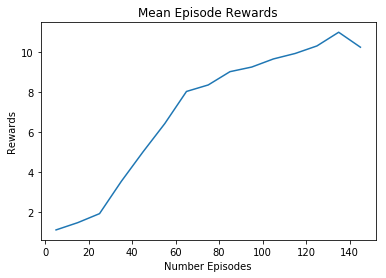

stop training
time spent:  8611


In [35]:
c = 10
gamma = 0.75
ne = 75
is_train = 0

get_shit_done(c, gamma, ne, 0)